ex1

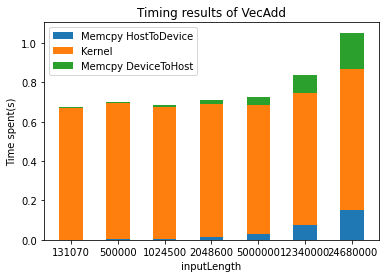

In [9]:
from matplotlib import pyplot as plt
import numpy as np

labels = ['131070', '500000', '1024500', '2048600', '5000000', '12340000', '24680000'] # inputLength

memcpy_HtoD = np.array([0.001086,0.003311,0.006397,0.012492,0.030461,0.076117,0.151735]) # CUDA memcpy HtoD 
kernel = np.array([0.670755,0.693620,0.668674,0.679471,0.653734,0.669683,0.718206]) # __global__ vecAdd
memcpy_DtoH = np.array([0.001112,0.003785,0.008055,0.016489,0.041028,0.092989,0.182792]) # CUDA memcpy DtoH 


width = 0.5

fig, ax = plt.subplots()

ax.bar(labels, memcpy_HtoD, width, label='Memcpy HostToDevice')
ax.bar(labels, kernel, width, bottom=memcpy_HtoD, label='Kernel')
ax.bar(labels, memcpy_DtoH, width, bottom=memcpy_HtoD+kernel, label='Memcpy DeviceToHost')

ax.set_xlabel('inputLength')
ax.set_ylabel('Time spent(s)')
ax.set_title('Timing results of VecAdd')
ax.legend()

plt.show()

ex3

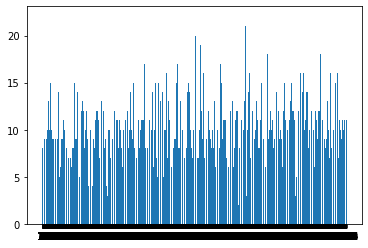

In [11]:
from matplotlib import pyplot as plt
import numpy as np
label_int = np.arange(4096)

label = label_int.astype(str)
hist = [9, 12, 12, 10, 8, 14, 7, 12, 11, 8, 9, 9, 9, 9, 7, 21, 16, 7, 7, 13, 10, 6, 8, 17, 10, 6, 11, 9, 11, 7, 9, 9, 12, 13, 14, 12, 7, 11, 14, 8, 9, 7, 13, 13, 4, 8, 5, 13, 13, 9, 8, 18, 13, 12, 8, 6, 9, 10, 9, 13, 15, 16, 12, 10, 15, 14, 14, 3, 13, 19, 7, 10, 14, 12, 9, 12, 6, 7, 9, 8, 8, 19, 5, 11, 8, 13, 7, 5, 15, 5, 7, 15, 7, 10, 13, 10, 11, 11, 10, 9, 7, 11, 7, 7, 13, 10, 14, 6, 19, 8, 9, 9, 15, 13, 14, 12, 13, 13, 13, 6, 7, 13, 10, 8, 6, 10, 7, 12, 8, 9, 10, 8, 9, 7, 8, 10, 10, 11, 7, 9, 13, 11, 16, 10, 8, 18, 14, 10, 8, 9, 9, 12, 9, 8, 3, 6, 8, 11, 16, 11, 5, 11, 10, 9, 11, 14, 12, 8, 14, 5, 11, 12, 13, 7, 8, 12, 9, 9, 7, 9, 5, 8, 6, 11, 11, 12, 8, 14, 11, 6, 12, 9, 10, 10, 10, 9, 9, 12, 15, 11, 13, 9, 6, 11, 8, 11, 9, 11, 9, 9, 13, 10, 8, 14, 12, 12, 15, 14, 11, 14, 11, 11, 5, 9, 9, 8, 16, 12, 9, 5, 10, 7, 6, 5, 12, 10, 9, 9, 7, 11, 6, 4, 13, 9, 10, 4, 6, 9, 15, 12, 10, 10, 13, 15, 7, 14, 9, 10, 8, 8, 9, 14, 11, 13, 11, 10, 11, 11, 9, 10, 6, 13, 13, 9, 13, 8, 13, 8, 4, 14, 4, 7, 15, 8, 18, 5, 11, 11, 8, 5, 11, 13, 5, 11, 12, 13, 11, 17, 9, 9, 10, 12, 8, 9, 7, 10, 8, 9, 8, 9, 5, 9, 10, 5, 11, 8, 12, 9, 7, 11, 10, 13, 10, 10, 8, 10, 14, 8, 9, 9, 9, 11, 10, 6, 8, 10, 6, 5, 7, 9, 9, 7, 9, 8, 11, 8, 12, 8, 11, 9, 14, 7, 12, 7, 7, 7, 10, 15, 8, 8, 18, 13, 12, 9, 6, 12, 8, 12, 16, 15, 9, 11, 8, 11, 14, 6, 8, 8, 12, 7, 7, 7, 11, 11, 17, 10, 11, 8, 9, 12, 13, 10, 9, 7, 6, 12, 12, 13, 8, 13, 10, 12, 11, 7, 15, 7, 18, 7, 8, 7, 16, 4, 7, 15, 10, 13, 9, 13, 5, 9, 13, 8, 11, 10, 7, 5, 13, 6, 11, 15, 18, 11, 13, 6, 13, 15, 15, 9, 7, 9, 6, 14, 13, 9, 6, 11, 13, 10, 9, 7, 3, 13, 15, 10, 8, 7, 9, 9, 13, 9, 7, 9, 9, 6, 8, 5, 5, 11, 14, 10, 14, 11, 11, 7, 13, 14, 13, 9, 12, 14, 8, 9, 8, 7, 13, 8, 10, 12, 11, 12, 10, 6, 12, 12, 11, 7, 17, 8, 12, 6, 8, 11, 5, 12, 6, 14, 10, 7, 7, 10, 14, 14, 12, 9, 12, 7, 16, 7, 16, 5, 8, 9, 12, 6, 11, 13, 13, 16, 13, 12, 10, 9, 15, 10, 6, 11, 10, 11, 7, 15, 9, 7, 13, 10, 8, 10, 9, 9, 8, 9, 10, 16, 17, 16, 8, 9, 12, 9, 9, 10, 9, 13, 8, 12, 6, 10, 8, 8, 17, 8, 11, 19, 14, 8, 18, 6, 8, 9, 10, 8, 7, 9, 10, 10, 10, 7, 14, 5, 7, 7, 8, 9, 15, 8, 12, 9, 12, 12, 10, 12, 7, 8, 12, 9, 10, 12, 13, 7, 11, 7, 9, 5, 11, 12, 13, 10, 9, 5, 10, 8, 8, 13, 14, 4, 8, 13, 7, 14, 13, 11, 15, 12, 12, 13, 10, 12, 9, 6, 11, 13, 6, 11, 2, 9, 10, 6, 8, 6, 12, 6, 10, 11, 13, 10, 9, 13, 8, 9, 8, 5, 13, 10, 10, 9, 10, 11, 16, 19, 10, 9, 11, 8, 7, 10, 11, 10, 11, 4, 8, 9, 7, 8, 10, 12, 13, 12, 11, 7, 10, 10, 9, 7, 15, 9, 7, 6, 5, 7, 4, 12, 9, 8, 12, 9, 8, 14, 11, 12, 9, 7, 10, 7, 13, 11, 7, 11, 9, 11, 13, 11, 8, 5, 13, 14, 9, 6, 13, 10, 10, 11, 6, 12, 16, 8, 14, 9, 0, 8, 10, 10, 13, 14, 10, 13, 12, 7, 10, 13, 13, 8, 9, 10, 6, 9, 17, 8, 15, 7, 11, 9, 14, 12, 9, 14, 9, 13, 8, 15, 6, 17, 12, 7, 11, 10, 11, 11, 7, 8, 10, 9, 9, 8, 11, 7, 8, 7, 11, 6, 12, 10, 9, 9, 13, 8, 8, 12, 14, 13, 13, 14, 17, 14, 12, 15, 8, 7, 7, 16, 8, 9, 9, 9, 11, 14, 10, 8, 9, 11, 8, 6, 10, 14, 14, 12, 8, 12, 9, 10, 7, 14, 6, 15, 13, 7, 6, 8, 10, 17, 8, 3, 11, 10, 13, 10, 8, 6, 8, 12, 6, 7, 15, 13, 9, 11, 9, 8, 12, 9, 13, 10, 16, 9, 10, 5, 11, 4, 9, 14, 11, 13, 18, 9, 17, 9, 11, 6, 3, 7, 9, 3, 10, 9, 15, 11, 7, 10, 11, 12, 13, 8, 14, 11, 10, 8, 22, 11, 9, 8, 8, 9, 14, 6, 15, 5, 9, 11, 10, 11, 15, 11, 13, 4, 15, 9, 9, 14, 13, 10, 8, 7, 7, 10, 12, 12, 10, 7, 8, 13, 5, 7, 8, 9, 9, 7, 4, 6, 5, 8, 13, 6, 9, 9, 5, 13, 7, 9, 9, 12, 3, 9, 7, 4, 14, 13, 13, 10, 8, 13, 8, 12, 9, 11, 7, 9, 11, 6, 8, 14, 7, 4, 15, 8, 6, 12, 13, 11, 7, 8, 9, 15, 14, 11, 9, 11, 10, 5, 8, 14, 8, 7, 10, 9, 10, 10, 12, 8, 12, 20, 8, 8, 11, 17, 8, 9, 12, 7, 13, 9, 3, 8, 9, 4, 9, 11, 14, 12, 11, 11, 5, 9, 9, 13, 13, 12, 5, 10, 13, 8, 8, 15, 15, 10, 13, 13, 6, 7, 11, 14, 15, 7, 11, 7, 7, 7, 14, 14, 11, 13, 11, 9, 9, 5, 9, 12, 10, 9, 9, 7, 11, 8, 13, 8, 11, 7, 6, 7, 8, 8, 11, 15, 6, 10, 12, 5, 7, 1, 5, 8, 9, 9, 10, 6, 7, 11, 12, 16, 10, 11, 14, 13, 9, 15, 8, 16, 10, 13, 14, 11, 9, 16, 11, 10, 11, 9, 8, 11, 10, 11, 9, 12, 8, 5, 15, 8, 6, 11, 10, 9, 8, 10, 10, 11, 14, 4, 11, 6, 10, 10, 8, 6, 8, 14, 8, 14, 5, 13, 16, 8, 3, 12, 10, 9, 15, 14, 10, 6, 12, 7, 12, 14, 5, 8, 11, 7, 12, 12, 10, 9, 13, 13, 10, 8, 11, 12, 11, 6, 10, 11, 11, 9, 8, 13, 12, 12, 12, 10, 14, 11, 15, 18, 10, 11, 13, 17, 6, 17, 5, 9, 14, 12, 16, 11, 8, 13, 6, 8, 13, 9, 17, 9, 7, 6, 10, 14, 6, 8, 13, 10, 5, 9, 8, 12, 11, 10, 9, 9, 9, 2, 10, 9, 12, 10, 9, 15, 3, 13, 10, 2, 12, 15, 12, 7, 11, 5, 7, 8, 11, 8, 9, 9, 7, 13, 8, 14, 7, 8, 11, 9, 14, 11, 8, 6, 14, 8, 8, 14, 10, 13, 15, 12, 9, 15, 10, 12, 10, 14, 14, 7, 9, 7, 10, 17, 11, 14, 12, 11, 10, 10, 10, 11, 9, 9, 14, 6, 5, 17, 7, 13, 11, 12, 10, 9, 9, 8, 11, 13, 11, 10, 9, 9, 12, 10, 15, 8, 7, 7, 6, 6, 5, 8, 4, 10, 9, 9, 13, 9, 13, 7, 9, 10, 10, 12, 9, 10, 9, 9, 14, 10, 14, 7, 10, 10, 14, 11, 13, 11, 11, 6, 10, 16, 9, 13, 8, 12, 14, 10, 2, 10, 11, 12, 11, 8, 9, 6, 15, 12, 8, 10, 11, 9, 7, 5, 10, 11, 10, 10, 8, 14, 11, 10, 12, 11, 14, 6, 9, 6, 12, 17, 7, 11, 15, 10, 16, 7, 4, 9, 10, 10, 13, 10, 8, 5, 12, 15, 11, 10, 13, 13, 10, 15, 7, 11, 9, 11, 13, 8, 12, 5, 8, 9, 13, 13, 7, 13, 4, 7, 5, 8, 11, 10, 8, 7, 6, 8, 11, 8, 14, 5, 14, 12, 4, 11, 10, 19, 10, 11, 8, 7, 12, 5, 17, 20, 15, 12, 11, 11, 12, 8, 10, 5, 11, 19, 11, 8, 16, 8, 18, 8, 14, 13, 11, 17, 8, 8, 10, 14, 8, 11, 8, 18, 13, 10, 5, 9, 8, 9, 11, 9, 9, 10, 5, 7, 17, 4, 14, 12, 7, 9, 12, 9, 5, 13, 9, 7, 15, 4, 11, 7, 6, 8, 11, 7, 12, 8, 14, 3, 16, 7, 13, 10, 10, 10, 13, 13, 12, 9, 7, 5, 11, 10, 9, 5, 9, 8, 18, 15, 5, 5, 9, 5, 12, 9, 12, 14, 10, 14, 15, 8, 7, 9, 14, 10, 13, 7, 6, 12, 8, 5, 7, 10, 11, 15, 5, 12, 8, 5, 9, 13, 12, 5, 8, 8, 8, 12, 7, 15, 10, 14, 7, 6, 9, 14, 9, 13, 9, 12, 14, 12, 20, 9, 7, 8, 12, 8, 7, 15, 13, 1, 7, 11, 13, 13, 13, 11, 9, 12, 8, 13, 14, 6, 11, 16, 11, 10, 7, 9, 5, 7, 14, 10, 4, 6, 11, 14, 13, 7, 9, 9, 10, 14, 8, 10, 9, 8, 16, 12, 14, 3, 7, 16, 8, 12, 5, 11, 15, 14, 12, 12, 9, 11, 10, 8, 10, 9, 5, 14, 10, 8, 8, 10, 9, 11, 11, 11, 6, 11, 9, 10, 6, 10, 7, 8, 10, 7, 14, 10, 14, 5, 13, 12, 11, 10, 10, 16, 11, 13, 8, 14, 12, 9, 9, 11, 14, 10, 12, 10, 7, 6, 12, 9, 10, 7, 9, 11, 11, 11, 6, 11, 13, 7, 13, 13, 12, 11, 16, 7, 8, 15, 7, 9, 7, 3, 11, 11, 12, 10, 12, 9, 14, 12, 12, 10, 10, 13, 14, 17, 11, 11, 15, 8, 13, 7, 8, 13, 5, 11, 8, 11, 9, 12, 6, 8, 13, 7, 10, 12, 12, 8, 9, 10, 8, 10, 12, 4, 5, 9, 13, 17, 13, 9, 11, 8, 10, 17, 9, 11, 13, 8, 18, 11, 8, 12, 10, 11, 6, 9, 16, 13, 10, 11, 9, 12, 12, 7, 4, 5, 5, 7, 7, 6, 16, 6, 8, 13, 9, 6, 9, 7, 4, 11, 12, 14, 14, 11, 14, 10, 16, 15, 8, 4, 7, 12, 18, 11, 9, 13, 14, 8, 11, 13, 9, 17, 10, 11, 5, 10, 5, 15, 7, 11, 10, 8, 10, 4, 8, 7, 4, 9, 8, 10, 11, 6, 8, 5, 6, 10, 7, 12, 8, 11, 17, 8, 6, 6, 9, 10, 9, 8, 3, 3, 14, 13, 6, 10, 12, 8, 11, 8, 8, 7, 12, 9, 11, 11, 14, 6, 10, 13, 13, 8, 5, 9, 7, 11, 10, 13, 15, 10, 10, 10, 6, 7, 11, 12, 5, 6, 10, 10, 11, 4, 9, 13, 9, 9, 11, 7, 14, 6, 15, 12, 16, 14, 9, 11, 5, 7, 5, 6, 12, 7, 10, 9, 11, 11, 14, 5, 13, 8, 13, 8, 12, 8, 15, 9, 13, 11, 11, 12, 5, 7, 12, 12, 8, 9, 11, 5, 10, 9, 10, 7, 6, 12, 7, 8, 9, 14, 12, 13, 13, 9, 9, 8, 8, 8, 8, 7, 9, 10, 13, 15, 7, 8, 10, 16, 9, 12, 11, 9, 10, 8, 11, 8, 14, 6, 9, 12, 13, 4, 13, 14, 10, 12, 13, 11, 9, 11, 10, 15, 9, 10, 6, 4, 13, 8, 8, 8, 9, 14, 10, 8, 12, 8, 11, 11, 9, 10, 8, 13, 12, 12, 6, 16, 9, 7, 9, 13, 6, 12, 11, 9, 11, 11, 7, 11, 10, 11, 10, 15, 10, 13, 11, 9, 6, 7, 14, 4, 5, 9, 15, 8, 11, 12, 5, 11, 13, 11, 11, 9, 14, 11, 12, 12, 11, 20, 8, 9, 11, 9, 13, 13, 5, 15, 12, 9, 9, 14, 7, 7, 10, 11, 6, 5, 7, 13, 14, 13, 9, 13, 14, 13, 7, 11, 13, 7, 11, 12, 11, 15, 10, 7, 11, 8, 10, 7, 10, 10, 7, 12, 10, 11, 10, 9, 14, 5, 12, 14, 19, 10, 7, 12, 12, 8, 14, 11, 10, 10, 13, 8, 8, 13, 19, 16, 10, 11, 11, 16, 13, 6, 14, 8, 12, 7, 7, 11, 12, 15, 10, 12, 10, 7, 9, 12, 10, 11, 13, 11, 8, 9, 9, 15, 14, 7, 10, 16, 9, 13, 10, 12, 5, 11, 11, 16, 7, 9, 9, 5, 6, 5, 14, 9, 5, 11, 20, 13, 7, 11, 12, 13, 8, 3, 7, 16, 9, 15, 14, 5, 13, 11, 12, 12, 8, 8, 3, 10, 9, 14, 9, 17, 4, 14, 15, 9, 11, 16, 12, 10, 10, 12, 6, 11, 8, 10, 12, 11, 10, 5, 9, 11, 8, 16, 15, 14, 11, 4, 9, 11, 6, 17, 12, 6, 6, 5, 14, 12, 14, 9, 8, 9, 8, 12, 13, 10, 13, 13, 10, 12, 10, 8, 11, 8, 11, 13, 11, 8, 12, 9, 9, 11, 7, 7, 10, 6, 14, 10, 6, 3, 13, 13, 8, 6, 5, 11, 11, 10, 14, 8, 5, 14, 14, 16, 8, 8, 10, 9, 8, 9, 9, 14, 14, 8, 10, 9, 11, 12, 8, 8, 12, 10, 14, 4, 13, 12, 7, 12, 14, 6, 7, 5, 13, 13, 13, 10, 14, 7, 12, 10, 6, 8, 9, 10, 11, 16, 6, 11, 13, 13, 8, 11, 12, 9, 7, 13, 11, 7, 9, 10, 7, 8, 8, 5, 9, 12, 11, 6, 8, 10, 9, 10, 15, 10, 10, 8, 10, 7, 10, 11, 7, 7, 9, 9, 8, 12, 9, 8, 8, 8, 10, 12, 7, 10, 13, 8, 7, 7, 10, 11, 8, 8, 8, 13, 10, 10, 6, 6, 5, 15, 10, 17, 14, 17, 12, 3, 15, 5, 8, 10, 9, 9, 15, 9, 7, 9, 8, 15, 15, 12, 8, 6, 5, 8, 18, 7, 10, 9, 9, 6, 9, 4, 13, 5, 7, 12, 8, 8, 8, 16, 8, 9, 9, 8, 11, 7, 15, 8, 8, 10, 9, 12, 5, 11, 7, 14, 12, 11, 6, 11, 8, 4, 14, 13, 10, 7, 5, 10, 10, 9, 10, 11, 4, 10, 11, 11, 11, 11, 11, 6, 10, 11, 5, 7, 7, 12, 6, 8, 15, 4, 10, 5, 13, 8, 10, 10, 9, 11, 7, 9, 11, 8, 8, 11, 10, 6, 10, 10, 7, 12, 11, 6, 6, 12, 6, 7, 5, 13, 16, 13, 8, 6, 10, 6, 17, 14, 12, 13, 11, 7, 10, 9, 11, 10, 12, 7, 7, 9, 12, 9, 6, 11, 5, 8, 7, 9, 12, 13, 7, 12, 11, 12, 4, 7, 13, 13, 15, 11, 7, 14, 11, 9, 7, 6, 14, 13, 12, 7, 7, 11, 7, 6, 7, 10, 7, 8, 8, 11, 6, 8, 12, 9, 16, 7, 11, 8, 9, 9, 6, 9, 7, 7, 8, 7, 15, 13, 13, 11, 10, 13, 6, 8, 11, 15, 7, 11, 8, 9, 12, 9, 10, 9, 9, 10, 19, 11, 21, 14, 10, 12, 9, 15, 10, 15, 8, 8, 11, 9, 16, 10, 12, 9, 12, 8, 9, 5, 7, 8, 14, 15, 6, 12, 5, 11, 8, 9, 2, 15, 11, 9, 5, 12, 8, 10, 14, 5, 10, 10, 7, 8, 9, 10, 14, 9, 9, 11, 11, 9, 5, 17, 10, 7, 7, 14, 4, 8, 10, 6, 8, 15, 9, 9, 3, 13, 11, 12, 11, 9, 14, 7, 7, 11, 8, 8, 10, 10, 5, 17, 7, 10, 11, 7, 4, 6, 10, 11, 11, 13, 11, 10, 17, 12, 13, 10, 14, 7, 7, 9, 6, 10, 12, 9, 17, 13, 14, 7, 13, 13, 5, 8, 10, 9, 5, 11, 9, 11, 12, 14, 8, 7, 21, 15, 7, 8, 11, 8, 12, 10, 13, 11, 6, 10, 14, 3, 9, 6, 10, 8, 11, 10, 10, 6, 4, 9, 6, 12, 9, 10, 7, 13, 5, 11, 6, 9, 8, 11, 11, 6, 10, 7, 14, 8, 10, 10, 12, 10, 11, 8, 11, 5, 10, 11, 11, 9, 16, 13, 8, 12, 8, 18, 11, 14, 9, 12, 10, 6, 12, 7, 7, 9, 13, 4, 13, 11, 9, 5, 15, 8, 15, 13, 7, 12, 12, 8, 13, 9, 7, 6, 14, 7, 7, 13, 14, 7, 12, 10, 9, 11, 8, 10, 13, 3, 5, 14, 6, 13, 8, 20, 8, 10, 8, 8, 14, 2, 6, 11, 5, 10, 10, 8, 13, 9, 12, 12, 9, 7, 9, 7, 10, 12, 13, 9, 13, 10, 10, 9, 4, 14, 11, 13, 12, 9, 21, 13, 17, 2, 10, 11, 13, 12, 11, 12, 8, 7, 9, 17, 5, 6, 9, 11, 9, 11, 9, 6, 13, 5, 7, 14, 6, 11, 8, 4, 9, 5, 10, 8, 13, 14, 11, 8, 13, 13, 12, 6, 8, 9, 10, 11, 8, 9, 8, 9, 11, 8, 10, 13, 8, 9, 16, 9, 5, 12, 11, 6, 8, 9, 14, 9, 12, 10, 4, 11, 12, 9, 10, 15, 12, 8, 13, 8, 11, 10, 12, 10, 17, 10, 15, 12, 9, 7, 12, 13, 8, 11, 10, 7, 9, 8, 13, 11, 12, 10, 9, 8, 12, 6, 6, 11, 16, 14, 11, 10, 6, 12, 13, 14, 12, 8, 11, 8, 10, 11, 14, 7, 12, 12, 8, 13, 7, 6, 9, 6, 6, 11, 15, 12, 13, 12, 10, 10, 12, 8, 11, 7, 7, 8, 8, 11, 9, 11, 7, 6, 9, 9, 9, 8, 18, 6, 12, 9, 11, 14, 16, 9, 10, 7, 19, 11, 7, 9, 8, 12, 8, 10, 10, 16, 9, 17, 9, 14, 10, 8, 11, 10, 8, 11, 11, 10, 12, 5, 6, 5, 7, 6, 9, 11, 12, 13, 9, 17, 4, 14, 9, 5, 14, 9, 7, 20, 15, 7, 10, 10, 11, 11, 9, 6, 8, 4, 13, 10, 14, 4, 18, 11, 9, 7, 11, 8, 4, 14, 10, 14, 8, 13, 5, 13, 8, 8, 9, 11, 7, 11, 15, 13, 8, 7, 9, 8, 8, 12, 9, 9, 15, 13, 12, 13, 12, 7, 8, 9, 9, 11, 9, 11, 11, 8, 11, 10, 3, 14, 9, 10, 7, 13, 13, 9, 7, 14, 11, 9, 14, 11, 10, 8, 8, 9, 7, 11, 6, 8, 9, 11, 12, 17, 9, 12, 15, 9, 14, 7, 8, 11, 11, 19, 12, 20, 15, 9, 12, 5, 10, 4, 8, 6, 7, 11, 14, 9, 7, 8, 5, 5, 18, 10, 17, 9, 11, 14, 13, 11, 10, 10, 12, 10, 12, 9, 7, 11, 13, 7, 8, 6, 9, 10, 9, 10, 8, 9, 9, 12, 10, 11, 10, 9, 12, 13, 9, 6, 6, 19, 5, 8, 7, 6, 11, 7, 9, 12, 11, 14, 12, 12, 15, 7, 11, 12, 13, 6, 11, 11, 9, 9, 7, 11, 14, 15, 10, 11, 10, 4, 9, 15, 7, 3, 10, 7, 13, 16, 11, 8, 12, 17, 12, 7, 12, 9, 10, 13, 4, 9, 14, 12, 10, 11, 6, 8, 11, 9, 17, 10, 6, 7, 9, 6, 5, 10, 9, 7, 3, 18, 9, 12, 14, 12, 18, 11, 14, 4, 13, 5, 6, 12, 8, 13, 6, 8, 7, 8, 16, 12, 10, 8, 11, 7, 12, 4, 7, 9, 10, 2, 10, 8, 11, 14, 9, 13, 8, 8, 6, 12, 3, 12, 9, 17, 7, 6, 11, 7, 16, 15, 10, 13, 10, 8, 13, 7, 6, 18, 15, 12, 14, 13, 12, 9, 6, 10, 14, 9, 5, 9, 11, 13, 10, 10, 13, 8, 12, 9, 8, 5, 10, 14, 12, 8, 11, 11, 8, 11, 10, 11, 11, 7, 9, 12, 5, 8, 8, 11, 5, 7, 8, 12, 16, 3, 7, 10, 11, 10, 10, 6, 12, 15, 5, 10, 5, 7, 5, 9, 7, 9, 11, 8, 12, 9, 3, 16, 12, 6, 10, 6, 16, 10, 10, 13, 14, 7, 6, 6, 8, 10, 8, 14, 10, 12, 11, 9, 11, 8, 14, 9, 9, 14, 9, 10, 12, 16, 8, 12, 13, 10, 12, 8, 6, 7, 7, 7, 9, 10, 6, 12, 16, 12, 8, 6, 16, 11, 7, 12, 8, 13, 9, 6, 13, 9, 10, 13, 11, 9, 10, 11, 14, 12, 14, 9, 10, 12, 8, 14, 7, 10, 14, 6, 6, 10, 8, 10, 6, 11, 6, 8, 16, 12, 17, 5, 8, 12, 9, 15, 13, 12, 10, 11, 12, 6, 10, 16, 9, 6, 5, 13, 8, 12, 9, 12, 7, 13, 6, 11, 11, 15, 9, 9, 7, 18, 4, 8, 7, 13, 11, 9, 12, 14, 12, 8, 8, 12, 7, 15, 12, 9, 12, 9, 8, 8, 14, 14, 13, 21, 12, 10, 11, 9, 11, 9, 14, 10, 8, 5, 8, 5, 11, 7, 7, 14, 8, 9, 9, 14, 11, 6, 12, 10, 11, 10, 7, 9, 10, 6, 13, 8, 10, 11, 11, 6, 7, 11, 6, 10, 7, 9, 13, 15, 12, 7, 7, 4, 8, 7, 12, 8, 8, 16, 7, 6, 9, 10, 15, 6, 14, 8, 13, 14, 5, 9, 6, 16, 13, 8, 14, 7, 8, 10, 11, 9, 19, 10, 12, 9, 12, 5, 5, 10, 5, 5, 9, 12, 14, 13, 6, 9, 6, 7, 10, 14, 8, 11, 12, 8, 13, 12, 7, 9, 12, 11, 5, 8, 7, 11, 12, 8, 13, 9, 13, 11, 9, 11, 9, 16, 6, 11, 6, 8, 3, 12, 11, 6, 10, 15, 10, 9, 14, 13, 13, 8, 8, 10, 17, 8, 4, 12, 7, 9, 12, 7, 7, 14, 8, 11, 11, 7, 14, 7, 9, 7, 12, 6, 12, 14, 8, 8, 12, 8, 6, 10, 7, 13, 10, 9, 5, 18, 8, 10, 10, 12, 8, 8, 9, 13, 18, 12, 10, 7, 8, 10, 11, 5, 9, 10, 17, 14, 8, 7, 10, 11, 7, 13, 11, 12, 11, 6, 9, 11, 7, 12, 11, 9, 9, 6, 9, 11, 13, 7, 15, 13, 8, 14, 12, 8, 7, 11, 5, 8, 10, 9, 10, 4, 5, 11, 11, 10, 13, 7, 7, 9, 12, 10, 8, 12, 10, 9, 7, 15, 10, 9, 6, 7, 15, 9, 9, 7, 9, 10, 10, 11, 8, 12, 8, 7, 12, 10, 11, 6, 16, 13, 10, 9, 9, 8, 4, 12, 14, 7, 8, 11, 11, 18, 10, 10, 9, 4, 11, 5, 9, 5, 10, 9, 6, 11, 10, 9, 7, 10, 8, 7, 15, 13, 9, 8, 10, 8, 9, 17, 12, 6, 16, 7, 7, 4, 11, 10, 11, 2, 8, 11, 16, 7, 8, 8, 10, 7, 13, 7, 6, 7, 6, 10, 7, 9, 13, 13, 8, 9, 11, 11, 9, 7, 5, 9, 15, 13, 14, 14, 8, 13, 10, 7, 5, 13, 16, 5, 12, 15, 10, 8, 13, 11, 16, 12, 11, 10, 13, 14, 15, 11, 8, 9, 7, 13, 10, 8, 11, 15, 5, 17, 11, 12, 18, 10, 12, 5, 6, 9, 9, 7, 12, 7, 11, 8, 11, 11, 5, 17, 9, 4, 7, 9, 9, 10, 16, 10, 7, 7, 12, 9, 10, 7, 6, 7, 11, 9, 5, 7, 18, 15, 11, 10, 16, 13, 14, 12, 8, 10, 13, 5, 9, 11, 3, 10, 12, 15, 11, 17, 12, 10, 6, 6, 11, 3, 10, 8, 15, 13, 9, 12, 11, 7, 9, 10, 17, 14, 8, 12, 9, 7, 7, 7, 10, 14, 8, 15, 9, 9, 12, 11, 21, 11, 21, 19, 11, 6, 7, 6, 8, 14, 11, 11, 11, 9, 15, 10, 17, 11, 13, 11, 5, 11, 10, 7, 4, 6, 12, 9, 11, 11, 11, 12, 11, 10, 9, 10, 10, 14, 15, 12, 6, 9, 11, 7, 10, 8, 5, 8, 7, 6, 8, 15, 8, 11, 9, 11];
plt.bar(label, hist)
plt.show()

ex2

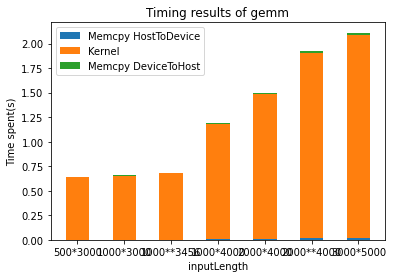

In [15]:
from matplotlib import pyplot as plt
import numpy as np

labels = ['500*3000', '1000*3000', '1000**3456', '1000*4000', '2000*4000', '2000**4000', '3000*5000'] # inputLength

memcpy_HtoD = np.array([0.000215,	0.000431,	0.002491,0.007768,	0.010462,	0.015366,	0.017723]) # CUDA memcpy HtoD 
kernel = np.array([0.643000,	0.654666,	0.679696,1.175394,	1.472597,	1.887082,	2.072227]) # __global__ vecAdd
memcpy_DtoH = np.array([0.000193,	0.001028,	0.000637, 0.008021,	0.016018,	0.018674,	0.020620]) # CUDA memcpy DtoH 


width = 0.5
fig, ax = plt.subplots()

ax.bar(labels, memcpy_HtoD, width, label='Memcpy HostToDevice')
ax.bar(labels, kernel, width, bottom=memcpy_HtoD, label='Kernel')
ax.bar(labels, memcpy_DtoH, width, bottom=memcpy_HtoD+kernel, label='Memcpy DeviceToHost')

ax.set_xlabel('inputLength')
ax.set_ylabel('Time spent(s)')
ax.set_title('Timing results of gemm')
ax.legend()

plt.show()

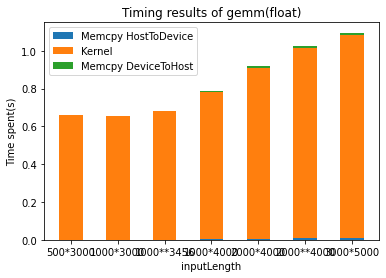

In [16]:
from matplotlib import pyplot as plt
import numpy as np

labels = ['500*3000', '1000*3000', '1000**3456', '1000*4000', '2000*4000', '2000**4000', '3000*5000'] # inputLength

memcpy_HtoD = np.array([0.000138,	0.000289,	0.001273,0.003855,	0.005632,	0.007999,	0.008855]) # CUDA memcpy HtoD 
kernel = np.array([0.660578,	0.653341,	0.678294 , 0.777841,	0.905066,	1.006080,	1.076331]) # __global__ vecAdd
memcpy_DtoH = np.array([0.000133,	0.000481,	0.000319, 0.004179,	0.008309,	0.009066,	0.010695]) # CUDA memcpy DtoH 


width = 0.5
fig, ax = plt.subplots()

ax.bar(labels, memcpy_HtoD, width, label='Memcpy HostToDevice')
ax.bar(labels, kernel, width, bottom=memcpy_HtoD, label='Kernel')
ax.bar(labels, memcpy_DtoH, width, bottom=memcpy_HtoD+kernel, label='Memcpy DeviceToHost')

ax.set_xlabel('inputLength')
ax.set_ylabel('Time spent(s)')
ax.set_title('Timing results of gemm(float)')
ax.legend()

plt.show()